**NAME - Ravi Teja**

In [1]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import wbgapi as wb
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from numpy import array, exp
from scipy.optimize import curve_fit

In [2]:
#Reading dataset function for specified format
dtfrme=pd.read_csv(r"C:\\Updated RaviTeja\World Indicator Repository.csv", low_memory=False)

In [3]:
#See the data loaded
dtfrme.head(12)

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,29.7,30.9,31.9,33.2,..
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,13,13.85,15.1,15.9,..
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,80.9,81.6,82.3,82.6,..
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.69999695,96.61613464,97.69999695,97.69999695,..
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,97.09197235,95.58617401,97.07563019,97.06671143,..
5,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,99.5,99.62602234,99.5,99.5,..
6,Afghanistan,AFG,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,14.89331245,..,..,..,..
7,Albania,ALB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,78.7,79.8,80.7,81.3,..
8,Albania,ALB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,60.5,62.5,63.25,64.6,..
9,Albania,ALB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,91.6,92.2,92.3,92.9,..


In [4]:
#Information of dataset
dtfrme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   1864 non-null   object
 1   Country Code   1862 non-null   object
 2   Series Name    1862 non-null   object
 3   Series Code    1862 non-null   object
 4   2017 [YR2017]  1862 non-null   object
 5   2018 [YR2018]  1862 non-null   object
 6   2019 [YR2019]  1862 non-null   object
 7   2020 [YR2020]  1862 non-null   object
 8   2021 [YR2021]  1862 non-null   object
dtypes: object(9)
memory usage: 131.4+ KB


In [5]:
#See the data loaded in transpose form
dtfrme.T

,0,1,2,3,4,5,6,7,8,9,...,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866
Country Name,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Albania,Albania,Albania,...,World,World,World,World,World,NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 04/27/2022
Country Code,AFG,AFG,AFG,AFG,AFG,AFG,AFG,ALB,ALB,ALB,...,WLD,WLD,WLD,WLD,WLD,NaN,NaN,NaN,NaN,NaN
Series Name,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN
Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,...,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN
2017 [YR2017],29.7,13,80.9,97.69999695,97.09197235,99.5,14.89331245,78.7,60.5,91.6,...,85.16356381,88.5937661,81.39432527,97.29130406,68.51611328,NaN,NaN,NaN,NaN,NaN
2018 [YR2018],30.9,13.85,81.6,96.61613464,95.58617401,99.62602234,..,79.8,62.5,92.2,...,85.67822849,89.56614135,83.20084408,97.42136036,..,NaN,NaN,NaN,NaN,NaN
2019 [YR2019],31.9,15.1,82.3,97.69999695,97.07563019,99.5,..,80.7,63.25,92.3,...,86.0916941,90.01130423,84.24698264,97.64521899,..,NaN,NaN,NaN,NaN,NaN
2020 [YR2020],33.2,15.9,82.6,97.69999695,97.06671143,99.5,..,81.3,64.6,92.9,...,86.47126752,90.52103753,82.65782634,97.26844525,..,NaN,NaN,NaN,NaN,NaN
2021 [YR2021],..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,NaN,NaN,NaN,NaN,NaN


In [2]:
ind_economy = ['NY.GDP.MKTP.CD','SL.TLF.CACT.NE.ZS']
c_code = ["AUS","PAK",'DNK','NOR','FRA','BRA','ESP','CHN','ARG','IND']
ind_env=['EN.ATM.CO2E.PC','EN.ATM.GHGT.KT.CE']
d_econ  = wb.data.DataFrame(ind_economy, c_code, mrv=7)
d_envir  = wb.data.DataFrame(ind_env, c_code, mrv=7)
#NY.GDP.MKTP.CD    : GDP current (US$)
#SL.TLF.CACT.NE.ZS	Labor force participation rate, total (% )
#EN.ATM.CO2E.PC:	CO2 emissions (metric tons per capita)
#EN.ATM.GHGT.KT.CE	Total greenhouse gas emissions

In [3]:
# Economy table
d_econ.columns = [b.replace('YR','') for b in d_econ.columns]      
d_econ=d_econ.stack().unstack(level=1)                             
d_econ.index.names = ['Code', 'Year']                           
d_econ.columns                                                     
d_econ.fillna(0)
d_econ.head(11)

series     NY.GDP.MKTP.CD  SL.TLF.CACT.NE.ZS
Code Year                                   
ARG  2015    5.947493e+11                NaN
     2016    5.575314e+11                NaN
     2017    6.436287e+11          58.810001
     2018    5.248197e+11          59.599998
     2019    4.519324e+11          60.290001
     2020    3.892881e+11          56.020000
AUS  2015    1.350534e+12          65.000000
     2016    1.206685e+12          64.870003
     2017    1.326883e+12          65.169998
     2018    1.428530e+12          65.629997
     2019    1.391953e+12          65.949997

In [4]:
# Climate table
d_envir.columns = [e.replace('YR','') for e in d_envir.columns]      
d_envir=d_envir.stack().unstack(level=1)                             
d_envir.index.names = ['Code', 'Year']                           
d_envir.columns                                                     
d_envir.fillna(0)
d_envir.head(12)

series     EN.ATM.CO2E.PC  EN.ATM.GHGT.KT.CE
Code Year                                   
ARG  2012        4.277882           348940.0
     2013        4.359886           358180.0
     2014        4.216361           356100.0
     2015        4.314434           362560.0
     2016        4.227539           366370.0
     2017        4.089472           367320.0
     2018        3.987234           365650.0
AUS  2012       16.969257           670930.0
     2013       16.398646           581890.0
     2014       15.755876           593500.0
     2015       15.786449           594580.0
     2016       15.872080           573390.0

In [5]:
#Setting the dataframe
d1=d_econ.reset_index()
d3=d1.fillna(0)
d2=d_envir.reset_index()
d4=d2.fillna(0)

In [6]:
#Two dataframes joined
final = pd.merge(d3, d4)
final.head(10)

series,Code,Year,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
0,ARG,2015,5.947493e+11,0.000000,4.314434,362560.0
1,ARG,2016,5.575314e+11,0.000000,4.227539,366370.0
2,ARG,2017,6.436287e+11,58.810001,4.089472,367320.0
3,ARG,2018,5.248197e+11,59.599998,3.987234,365650.0
4,AUS,2015,1.350534e+12,65.000000,15.786449,594580.0
5,AUS,2016,1.206685e+12,64.870003,15.872080,573390.0
6,AUS,2017,1.326883e+12,65.169998,15.738647,619790.0
7,AUS,2018,1.428530e+12,65.629997,15.475516,615380.0
8,BRA,2015,1.802212e+12,63.700001,2.347366,1082700.0
9,BRA,2016,1.795693e+12,63.480000,2.143498,1051690.0


In [7]:
#Normalize dataset values
final1 = final.iloc[:,2:]
final.iloc[:,2:] = (final1-final1.min())/ (final1.max() - final1.min())
final.head(5)

series,Code,Year,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
0,ARG,2015,0.023795,0.000000,0.232141,0.025728
1,ARG,2016,0.021064,0.000000,0.226368,0.026037
2,ARG,2017,0.027383,0.829595,0.217195,0.026114
3,ARG,2018,0.018663,0.840739,0.210403,0.025979
4,AUS,2015,0.079269,0.916914,0.994311,0.044577


In [8]:
#K-means Clustering
dat_v = final.drop('Code', axis = 1)
kmean = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(dat_v)

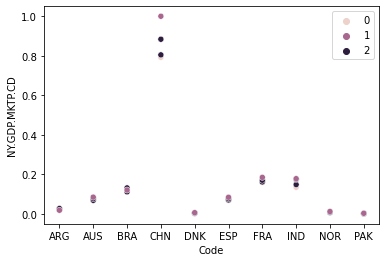

In [9]:
#Clustering the dataset on Electric power consumption
import seaborn as sns
sns.scatterplot(data=final, x="Code", y="NY.GDP.MKTP.CD", hue=kmean.labels_)
plt.legend(loc='best')
plt.show()

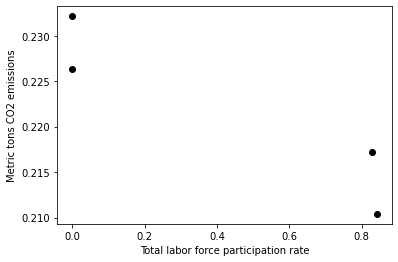

In [10]:
#Visualisation for relationship between Total labor force participation rate and Metric tons CO2 emissions 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
cy=final[(final['Code']=='ARG')]
datafrm = cy.values
x, y = datafrm[:, 3], datafrm[:, 4]
plt.scatter(x, y,color="black")
plt.xlabel('Total labor force participation rate')
plt.ylabel('Metric tons CO2 emissions')
plt.show()

Covariance final value:  [[ 3.84816087e-01 -3.21428672e-01  1.19458401e-05]
 [-3.21428672e-01  2.68506405e-01 -1.99535589e-05]
 [ 1.19458401e-05 -1.99535589e-05  8.33191281e-06]]
Parameters final value:  [-0.70767954  0.57255108  0.22925437]


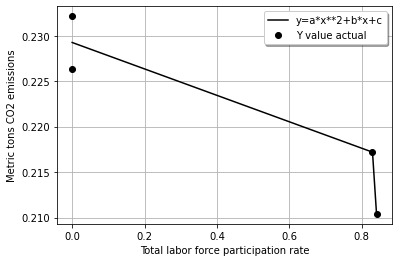

In [11]:
#curve_fit usage for Argentina which has a low GDP as per clustering
x, y = datafrm[:, 3], datafrm[:, 4]

def fnct(x, a, b, c):
    return a*x**2+b*x+c
parame, covari = curve_fit(fnct, x, y)
parame, _ = curve_fit(fnct, x, y)
print("Covariance final value: ", covari)
print("Parameters final value: ", parame)

a, b, c = parame[0], parame[1], parame[2]
yfit =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="black")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y value actual",color="black")
    plt.xlabel('Total labor force participation rate')
    plt.ylabel('Metric tons CO2 emissions')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

Covariance final value:  [[ 1.74849596e+01 -1.74603994e+01  3.47920475e-05]
 [-1.74603994e+01  1.74359434e+01 -6.94860018e-05]
 [ 3.47920475e-05 -6.94860018e-05  3.46939546e-05]]
Parameters final value:  [-1.2229013   1.21016481  0.42807597]


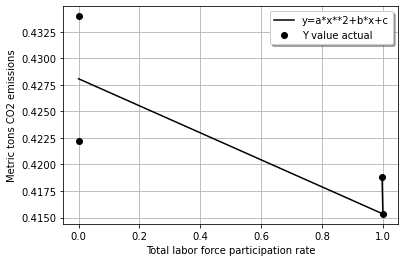

In [13]:
#curve_fit usage for China which has a high GDP as per clustering

cy1=final[(final['Code']=='CHN')]
datafrm1 = cy1.values

x, y = datafrm1[:, 3], datafrm1[:, 4]

def fnct(x, a, b, c):
    return a*x**2+b*x+c
parame, covari = curve_fit(fnct, x, y)
parame, _ = curve_fit(fnct, x, y)
print("Covariance final value: ", covari)
print("Parameters final value: ", parame)

a, b, c = parame[0], parame[1], parame[2]
yfit =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="black")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y value actual",color="black")
    plt.xlabel('Total labor force participation rate')
    plt.ylabel('Metric tons CO2 emissions')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

Covariance final value:  [[ 613154.63679993 -965457.79256754  380043.1507453 ]
 [-965457.79256831 1520186.63440411 -598407.28131054]
 [ 380043.1507459  -598407.28131101  235557.62669109]]
Parameters final value:  [-286.05089375  450.40759712 -177.04215982]


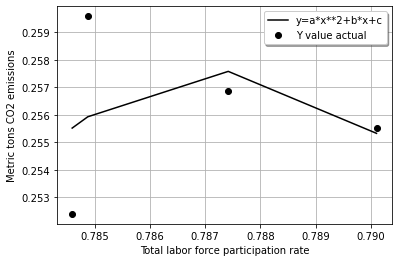

In [14]:
#curve_fit usage for France which has a medium GDP as per clustering

cy3=final[(final['Code']=='FRA')]
datafrm2 = cy3.values

x, y = datafrm2[:, 3], datafrm2[:, 4]

def fnct(x, a, b, c):
    return a*x**2+b*x+c
parame, covari = curve_fit(fnct, x, y)
parame, _ = curve_fit(fnct, x, y)
print("Covariance final value: ", covari)
print("Parameters final value: ", parame)

a, b, c = parame[0], parame[1], parame[2]
yfit =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="black")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y value actual",color="black")
    plt.xlabel('Total labor force participation rate')
    plt.ylabel('Metric tons CO2 emissions')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

**Conclusion
The country with a low GDP and high has an indirect relationship between the total labor force participation rate and the metric tons CO2 emissions. The country with a medium GDP has a direct relationship between the total labor force participation rate and the metric tons CO2 emissions till a certain total labour participation rate which turns into an indirect relationship after that**

In [12]:
def err_ranges(x, func, param, sigma):
    import itertools as iter
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 